Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Unzip the npz files. npz is zipped numpy files.
!unzip /content/ORL_faces.npz

Archive:  /content/ORL_faces.npz
replace testY.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: testY.npy               
replace testX.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: testX.npy               
replace trainX.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: trainX.npy              
replace trainY.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: trainY.npy              


In [3]:
# Load the train and test data. The train and test split is already provided to us.
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")



In [4]:
# Print the shapes
# 240 images in train and 160 images in test. Totally we have 400 images
# Each image is of size 112 * 92
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [5]:
# Print the Y variable
# Y is classes 0 to 19. This means there are 20 people, 20 images per person.
trainY

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [6]:
testY

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

In [7]:
# Convert the numbers to categorical - one hot encoding. 
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

In [8]:
trainY

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
trainX.shape

(240, 10304)

In [10]:
# Reshape the arrays 
trainX = trainX.reshape(240,112,92,1)
testX = testX.reshape(160,112,92,1)

[[110. 109. 111. ... 111. 113. 116.]
 [108. 111. 109. ... 113. 112. 113.]
 [108. 109. 111. ... 110. 114. 115.]
 ...
 [137. 137. 141. ...  95.  89.  90.]
 [140. 133. 144. ...  96.  86.  90.]
 [142. 136. 138. ...  94.  88.  90.]]


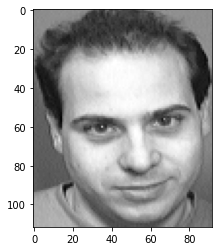

In [11]:
#print the image
# The array should be a 2d array for a gray scale image. Reshape each image to 112 * 92
import matplotlib.pyplot as plt
trainX = trainX.reshape(240,112,92)
print(trainX[100])
plt.imshow(trainX[100],cmap='gray')

## Build the Graph

In [12]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
# Reshape the input to 112 * 92 * 1. Since its grayscale image, it has 1 channel.
model.add(tf.keras.layers.Reshape((112,92,1),input_shape=(112,92,1)))
# Normalize the input images. This converts them to a number between 0 and 1.
# Neural network works best when the input is normalized, since the weights are mostly between 0 and 1.
# Model training is faster when input is normalized.
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(16, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [13]:
# Flatten the input as Dense layer expects the input to be flattened.
model.add(tf.keras.layers.Flatten())
# Activation is softmax since this is classification problem and output is 20 since we have 20 classes.
model.add(tf.keras.layers.Dense(20, activation='softmax'))

In [14]:
# Loss function is categorical_crossentropy since its a classification problem.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 112, 92, 1)        0         
                                                                 
 batch_normalization (BatchN  (None, 112, 92, 1)       4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 110, 90, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 45, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 43, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 21, 32)       0

## Train the model

In [16]:
#Train the model
history = model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=40,
          batch_size=16)

Epoch 1/40
15/15 [==============================] - 2s 34ms/step - loss: 2.9736 - accuracy: 0.1708 - val_loss: 3.2836 - val_accuracy: 0.0500
Epoch 2/40
15/15 [==============================] - 0s 19ms/step - loss: 1.5514 - accuracy: 0.8208 - val_loss: 22.0129 - val_accuracy: 0.0500
Epoch 3/40
15/15 [==============================] - 0s 19ms/step - loss: 0.2165 - accuracy: 0.9458 - val_loss: 36.9585 - val_accuracy: 0.0500
Epoch 4/40
15/15 [==============================] - 0s 18ms/step - loss: 0.2518 - accuracy: 0.9375 - val_loss: 18.0774 - val_accuracy: 0.0500
Epoch 5/40
15/15 [==============================] - 0s 17ms/step - loss: 0.0636 - accuracy: 0.9833 - val_loss: 16.1178 - val_accuracy: 0.0500
Epoch 6/40
15/15 [==============================] - 0s 17ms/step - loss: 0.0254 - accuracy: 0.9875 - val_loss: 8.1652 - val_accuracy: 0.0938
Epoch 7/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0168 - accuracy: 0.9958 - val_loss: 5.0976 - val_accuracy: 0.2500
Epoch 8/4

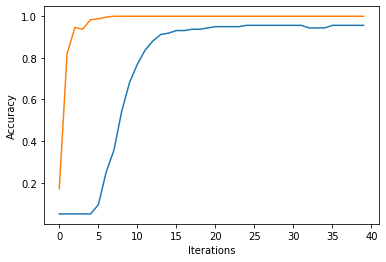

In [17]:
# Plot the accuracy and iterations
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Test the model and see if the predictions are correct.
# take a random image 
rnd=np.random.randint(100)
testX = testX.reshape(160,112,92,1)
test_new = testX[[rnd]]

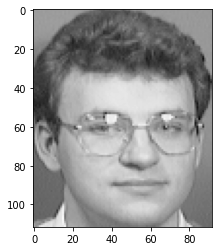

predicted class: 5


In [19]:
y_pred = model.predict(test_new)
y_pred = (np.argmax(y_pred, axis=1))
plt.imshow(testX[rnd].reshape(112,92),cmap='gray')
plt.show()
print("predicted class:", y_pred[0])


In [20]:
# Now find any train image of the same class and see if its the same person
# reverse the one hot encoding to number, so we can compare
idx = np.argwhere(trainY.argmax(-1) == y_pred[0])


In [24]:
#Different Images of a same person belonging to the same class
idx

array([[60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71]])

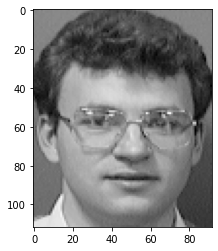

In [25]:
# Print the image to see if it matches with the prediction
plt.imshow(trainX[idx[0]].reshape(112,92),cmap='gray')
plt.show()

In [23]:
# We can see that the prediction and actual images refers to the same person.
# This means our model is working as expected. It is able to recognize the faces with 95% accuracy.